## Лабораторная работа № 6
# Поиск безусловного экстремума функции
---
## Задание:
>Найти точку минимума функции $f(x_1,x_2)=e^{\frac{x_1}{2}}(x_1+x_2^2)$, $[x_1^0=1, x_2^0=-3]$ методом Ньютона-Рафсона. Для одномерной минимизации использовать метод золотого сечения. В окрестности точки минимума оценить овражность, построить линии уровня и траекторию поиска. Исследовать условия сходимости.
>Обеспечить работу программы с исходной функцией в режиме «черного ящика».
>Обеспечить работу программы с функциями с размерностью на единицу выше заданной.
>Обеспечить работу программы с функциями любой размерности (до  10 включительно).


### Метод Ньютона-Рафсона как модификация метода Ньютона
#### Метод Ньютона
Данный метод основывается на том предположении, что заданную функцию можно локально аппроксимировать квадратичной функцией. Запишем для функции $f(x)$ в окрестности точки $x^k$ формулу Тейлора второго порядка: $f(x)=Q_k(x)+o(||x−x^k||)$, где $||x−x^k||→0$ при $k→∞$ $Q_k(x)=f(x^k)+(\nabla f(x_k),(x−x^k)) + \frac{1}{2}(∇^2f(x^k)(x−x^k),(x−x^k))$. Если гессиан $\nabla^2f(x^k)$ (матрица, составленная из вторых производных) функции $f(x)$ положительно определен, то квадратичная функция $Q_k(x)$ гарантированно достигает глобального минимума в точке $x^{k+1} = x^k −[∇^2f(x^k)]^{−1}∇f(x^k)$. Отсюда несложно получить формулу для нахождения $p^k$ — вектора, определяющего направление движения от точки $x^k$ к точке $x^{k+1}$: $p^k =−[∇^2f(x^k)]^{−1}∇f(x^k)$ $*$ при $α_k =1$ .
#### Метод Ньютона-Рафсона
Чтобы обеспечить сходимость метода для любого начального приближения x0, метод Ньютона модифицируют, вводя переменный множитель $α_k$, получая фактически метод спуска. В этом методе направление спуска определяется формулой $(*)$, а множитель $α_k$, регулирующий длину шага, выбирается таким образом, чтобы выполнялось неравенство $f(x^k + α_kp^k) ≤ f(x^k)+εα_k(∇f(x^k),p^k)$, где $ε∈(0,\frac{1}{2})$	— наперед заданная постоянная, одна и та же для всех итераций. В данной работе было выбрано значение $ε=0.1$. Выбор значения $α_k$ происходил как в градиентных методах с дроблением шага, а именно, следующим образом: положив сначала $α_0 = α$ проверялось неравенство $f(x^k +α_0p^k)<f(x^k)$.
Если оно выполнялось, брали $α_k =α_0$, если нет — значение $α_0$ изменяли, домножая на фиксированный наперед заданный множитель $λ$, который в данной работе был выбран равным $λ = \frac{1}{2}$ и снова проверяли неравенство, продолжая до тех пор, пока оно не начинало выполняться. В качестве начального значения $α_0$ бралось $α =1$ .
## Одномерная минимизация - метод золотого сечения
Поиск с помощью метода золотого сечения основан на разбиении отрезка неопределенности на две части, известном как "золотое сечение". При этом отношение длины всего отрезка к большей части равно отношению большей части к меньшей и равно числу $τ = 2^{−1}(1 +√5) ≃ 1.6118$ ($τ$-корень уравнения $τ^2 = 1+τ$). В методе золотого сечения точки $x_1$ и $x_2$ на каждом отрезке неопределенности $[a,b]$ выбираются по правилу $x_1 = b−\frac{(b−a)}{τ}$, $x_2 = a + \frac{(b−a)}{τ}$. 
## Исследование условий сходимости
---
>1.) Для сходимости итерационного процесса необходима непрерывность функции в окрестности точки экстремума. Как видно, функция этому условию удовлетворяет.

>2.) Сходимость метода заведомо гарантируется только при положительной определенности гессиана функции. Из критерия Сильвестра- "для того, чтобы квадратичная форма, пораждаемая данной матрицей была положительно определенной, необходимо и достаточно, чтобы все окаймляющие миноры этой матрицы были положительными". Этот критерий проверяется во время работы программы, и в случае его невыполнения, программа возвращает сообщение об ошибке.

## Оценка овражности
Найдя координаты минимума $x$ исследуемой функции, представляется возможным оценить её показатель овражности в окрестности этого минимума. По определению, под показателем овражности $θ$ функции $f(x)$ в окрестности точки минимума $x$ подразумевают отношение наибольшего собственного числа матрицы Гессе $∇^2f(x)$ к наименьшему. Чем больше этот показатель, тем более вытянутым и крутым является "овраг" поверхности уровня $f(x)$ в окрестности $x$ и тем медленнее сходятся в этой окрестности градиентные итерационные методы. 

In [12]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm, inv, eig, det
#исходная функция
def f(x):
    return np.exp(x[0]/2)*(x[0]+x[1]**2) 
def f2(x):
    return -(4-2*(x[0]-3)**2-(x[1]-2)**2-3*(x[2]+1)**4)
def f1(x):
    return x[0]**2+x[1]**2+x[2]**2+x[3]**2+x[4]**2+x[5]**2+x[6]**2+x[7]**2+x[8]**2+x[9]**2
#вычисление градиента в точке
def grad(xx):
    h=0.0001
    dim=len(xx)
    g=np.array([0.]*dim)
    for i in range(dim):
        hi=np.array([0.]*dim)
        hi[i]=0.0001
        g[i]=((f(xx+hi)-f(xx-hi))/2/h)
    return g

#вычисление обратного гессиана в точке
def gess(xx):
    dim=len(xx)
    h=0.0001
    df=np.zeros((dim, dim))
    e=np.eye(dim)
    for j in range(0, dim):
        for k in range(0, dim):
            a=xx+(e[j]+e[k])*h
            b=xx+e[j]*h
            c=xx+e[k]*h
            l=f(a)-f(b)-f(c)+f(xx)
            df[j][k]=l/h**2
    return df

def func(x, e, nk):
    kj=10000
    xk=[]
    i=1
    while kj>e:
        xk.append(x)
        u=2
        v=1
        p=-np.dot(inv(gess(x)), grad(x))
        a=1
        while u>v:
            u=f(x+a*p)
            v=f(x)
            a*=1/2
        x1=x+a*p
        kj=norm((x1-x), 1)/norm(x1,1)
        x=x1
        i+=1
        if i>nk:
            break
    xk.append(x1)
    return xk,i

def m1():
    ni=int(input('the number of variables = '))
    x0=[]
    eps=float(input('epsilon= '))
    nl=int(input('max iterations='))
    print('the coordinates of the starting point:')
    for j in range(ni):
        print('x0[', j+1, ']')
        x0.append(float(input()))
    print('x0 =',x0)
    hl=gess(x0)
    p=0
    for m in range(1,ni+1):
        hk=np.zeros((m, m))
        for n in range(m):
            for k in range(m):
                hk[n][k]=hl[n][k]
        if det(hk)>0:
            p+=1
    if p!=ni:
        return 'method diverges!'
    else:
        xm, q = func(x0, eps, nl)
        xs=np.zeros((q, len(x0)))
        print('-step-|---------------[x1,...,xn]---------------')
        for l in range(q):
            for t in range(len(x0)):
                xs[l][t]=xm[l][t]
            print(repr(l).center(5), '|', xs[l])
    return xs 

def m2():
    x0=[]
    y0=[]
    h=0
    eps=float(input('epsilon= '))
    print('ends of the x-segment:')
    for j in range(2):
        print('x0[', j+1, ']')
        x0.append(float(input()))
    print('ends of the y-segment:')
    for j in range(2):
        print('y0[', j+1, ']')
        y0.append(float(input()))
    y=0
    a=x0[0]
    b=x0[1]
    kj=100
    while kj>eps:
        x1x=[]
        x2x=[]
        alfx=a+(b-a)*2/(3+np.sqrt(5))
        betx=a+(b-a)*2/(1+np.sqrt(5))
        x1x.append(alfx)
        x1x.append(y)
        x2x.append(betx)
        x2x.append(y)
        if (f(x1x))>(f(x2x)):
            a=alfx
        else:
            b=betx
        ki=abs(f(x1x)-f(x2x))/abs(f(x2x))
        h+=1
        if alfx==betx:
            break
    c=y0[0]
    d=y0[1]
    kj=100
    while kj>eps:
        x1x=[]
        x2x=[]
        alfy=c+(d-c)*2/(3+np.sqrt(5))
        bety=c+(d-c)*2/(1+np.sqrt(5))
        x1x.append(alfx)
        x1x.append(alfy)
        x2x.append(alfx)
        x2x.append(bety)
        if (f(x1x))>(f(x2x)):
            c=alfy
        else:
            d=bety
        ki=abs(f(x1x)-f(x2x))/abs(f(x2x))
        h+=1
        if alfy==bety:
            break
    print('min: [x, y] = ', x1x, 'шагов :', h)
    

In [2]:
xt = m1()

the number of variables = 2
epsilon= 0.001
max iterations=20
the coordinates of the starting point:
x0[ 1 ]
-1
x0[ 2 ]
1
x0 = [-1.0, 1.0]
-step-|---------------[x1,...,xn]---------------
  0   | [-1.  1.]
  1   | [-0.999925   0.4999625]
  2   | [-1.27264566  0.31816483]
  3   | [-1.51103817  0.19701338]
  4   | [-1.69473824  0.11660742]
  5   | [-1.82199412  0.06572657]
  6   | [-1.90188768  0.03549091]
  7   | [-1.94807117  0.01856618]
  8   | [-1.97321138  0.0095171 ]
  9   | [-1.98638279  0.00482156]
  10  | [-1.99313297  0.00242722]
  11  | [ -1.99655135e+00   1.21784496e-03]
  12  | [ -1.99827174e+00   6.10013074e-04]
  13  | [ -1.99913482e+00   3.05291360e-04]


In [70]:
print(m2())

epsilon= 0.01
ends of the x-segment:
x0[ 1 ]
-3
x0[ 2 ]
0
ends of the y-segment:
y0[ 1 ]
-1
y0[ 2 ]
1
min: [x, y] =  [-2.0000000255826418, -1.4901161193847656e-08] шагов : 188
None


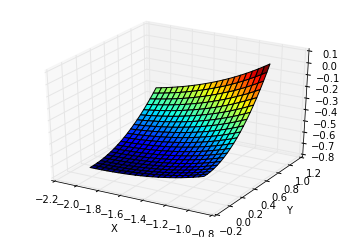

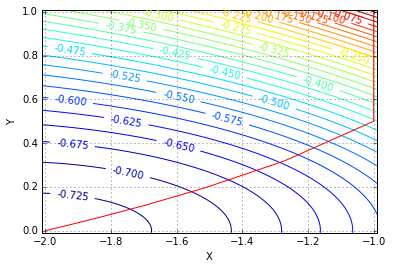

In [11]:
#построение поверхности, линий уровняи траектории поиска
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.linspace(min(xt[:,0])-0.01, max(xt[:, 0])+0.01, 200)
Y = np.linspace(min(xt[:,1])-0.01, max(xt[:,1])+0.01, 200)
X, Y = np.meshgrid(X, Y)
R=[X, Y]
Z = f(R)
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet)
pl.xlabel('X')
pl.ylabel('Y')
plt.show()
pl.plot(xt[:,0], xt[:,1], 'r-')
cs = pl.contour(X, Y, Z, 30, cmap=cm.jet)
pl.clabel(cs)
pl.xlabel('X')
pl.ylabel('Y')
pl.grid(True)
pl.show()

In [13]:
#овражность
d=eig(gess(xt[qp-1]))
d1=max(d[0])
d2=min(d[0])
print('Овражность = ', d1/d2)

Овражность =  3.99787117412
